<table border="0" width="100%"><tr><td width=80 bgcolor="white"><p align="left"></p></td><td align="center" bgcolor="white"><font size="7">Python之函数</font></td></tr></table>

<hr style="border:none;border-top:1px dotted red;">

利用函数可以将一些相关的语句组合在一起，例如利息计算的代码，从而让它们可以在程序中多次执行。函数对于程序设计有以下两个重要作用：
- 任务分解
- 代码重用

在前面的章节中，我们一直在使用系统内置函数。例如，在需要输入的时候，只需要使用 ``input()`` 函数，而不需要关心具体的实现细节。本章主要学习如何创建和使用自定义函数。

## 1　定义和调用函数
Python 中使用 def 语句创建函数，其一般的格式如下所示：
```python
def name(arg1, arg2, ...,argN):
    statements
```

下面这段代码**定义**了一个简单函数。

In [1]:
def repeator(s, n):
    result = s * n
    print(result)

这段代码仅仅是对函数的定义，并没有调用执行。这条定义语句运行后会新建一个名为 repeator 的变量名，其类型为 function，即函数。

In [2]:
type(repeator)

function

与内置函数一样，定义完函数后，可以通过函数名**调用**执行。

In [ ]:
repeator('金融科技', 3)

在很多情况下，函数需要将计算的结果返回到调用处。在这类函数的函数体中，通常包含一条 return 语句：
```python
def name(arg1, arg2, ...,argN):
    statements 
    return value
```

在创建函数时， 没有在函数体中添加 return 语句，Python 也会默默地在函数体最后添加一条 return None。

In [3]:
ret_val = repeator('金融科技', 3)
print(ret_val)

金融科技金融科技金融科技
None


下面的代码对 repeator 函数进行改造：

In [4]:
def repeator2(s, n):
    result = s * n
    return result

In [5]:
ret_val = repeator2('金融科技', 3)
print(ret_val)

金融科技金融科技金融科技


上面的函数调用过程，如下图所示：
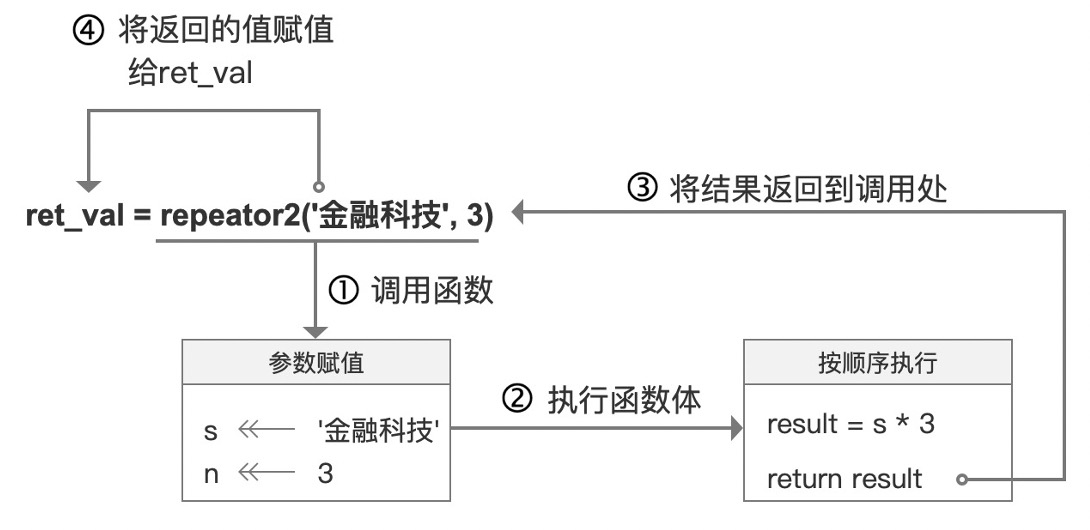

在 Python 中， 还允许在函数中返回多个值。 只需将返回值以逗号隔开， 放在 return 关键字后面即可。

In [6]:
def calculator(m, n): 
    return m+n, m-n, m*n, m/n

In [7]:
i, j = 10, 8
result1, result2, result3, result4 = calculator(i, j)
print('{} 和 {} 的加减乘除运算结果是：{}，{}，{}，{}'.format(i, j, result1, result2, result3, result4))

10 和 8 的加减乘除运算结果是：18，2，80，1.25


在这里总结一下函数调用的四个步骤： 

（1）程序执行到函数调用时，在调用处暂停，等待函数执行完毕； <br>
（2）将实参赋值给函数的形参； <br>
（3）执行函数体中的语句； <br>
（4）调用结束后，回到调用前暂停处继续执行，如果函数体中执行了 return 语句， return 关键字后的值会返回到暂停处，供程序使用，否则函数返回 None 值。<br>

## 2 <font color=#A93226>案例：</font>个人所得税计算器

<font size=3 face="楷体-简">所谓个人所得税（personal income tax）， 是以个人（自然人）取得的各项应税所得为对象征收的一种税， 是调整征税机关与自然人（居民、非居民个人）之间在个人所得税的 征纳与管理过程中所发生社会关系的法律规范的总称。

根据最新税法规定， 居民个人的综合所得， 以每一纳税年度的收入额减除 6 万元（起 征点为每月 5 000 元）以及专项扣除、专项附加扣除和依法确定的其他扣除后的余额， 为应纳税所得额。

个人综合所得适用 7 级超额累进税率，即把征税对象的数额划分为若干等级，对每个等级部分的数额分别规定相应税率，分别计算税额，各级税额之和为应纳税额。也就是说征税对象数额超过某一等级时，仅就超过部分，按高一级的税率计算征税额。因此，通常应交所得税计算公式为： 
```python
应交所得税 = 应税所得 * 适用税率 – 速算扣除数
```
其中， 速算扣除数是按全额累进方法计算出的税额比按超额累进方法计算出的税额多，即有重复计算的部分，如表所示：
</font>

|级数|全年应纳税所得额|税率|速算扣除数|
|--|:--------|--|-----|
|1|不超过36000元的部分|3%|0|
|2|超过36000至144000元的部分|10%|2520|
|3|超过144000至300000元的部分|20%|16920|
|4|超过300000至420000元的部分|25%|31920|
|5|超过420000至660000元的部分|30%|52920|
|6|超过660000至960000元的部分|35%|85920|
|7|超过960000的部分|45%|181920|

<font size=3 face="楷体-简">编写程序，实现个人所得税计算器。用户输入全年综合所得以及各项扣除之和后，计算出应纳税额和税后收入。 </font>

程序代码如下所示：


In [8]:
def getTaxRateAndDeduction(tax_income):
    if tax_income <= 36000:
        tax_rate, deduction = 0.03, 0
    elif tax_income <= 144000:
        tax_rate, deduction = 0.1, 2520        
    elif tax_income <= 300000:
        tax_rate, deduction = 0.2, 16920      
    elif tax_income <= 420000:
        tax_rate, deduction = 0.25, 31920      
    elif tax_income <= 660000:
        tax_rate, deduction = 0.30, 52920
    elif tax_income <= 960000:
        tax_rate, deduction = 0.35, 85920
    else:
        tax_rate, deduction = 0.4, 181920
    return tax_rate, deduction

def getTaxAmt(year_income, reduce_amt):
    tax_income = year_income - reduce_amt - 60000
    if tax_income < 0:
        return 0
    else:
        rate, deduction_amt = getTaxRateAndDeduction(tax_income)
        tax = tax_income * rate - deduction_amt
        return tax

user_year_income = float(input('请输入全年综合所得：'))
print('各项扣除之和是指专项扣除、专项附加扣除和依法确定的其他扣除之和。')
user_reduce_amt = float(input('请输入全年各项扣除之和：'))
user_tax = getTaxAmt(user_year_income, user_reduce_amt)
print('全年应纳税额为：{:.2f}元\n全年税后收入为：{:.2f}元'.format(user_tax, user_year_income - user_tax))

请输入全年综合所得：0
各项扣除之和是指专项扣除、专项附加扣除和依法确定的其他扣除之和。
请输入全年各项扣除之和：0
全年应纳税额为：0.00元
全年税后收入为：0.00元


## 3　函数参数
### 3.1　参数传递
参数的传递过程，实际上是一个赋值的过程。在调用函数时，调用者的实际参数自动赋值给函数的形式参数变量。

In [ ]:
def avg(m, n):
    return (m + n) /2

In [ ]:
avg(10, 8)

### 3.2　不可变和可变类型参数
目前我们所学习的不可变类型包括：整型、浮点型、字符串和元组，可变类型有：列表、字典和集合等。这些都可以作为参数的类型。但参数在函数中使用时，这两种类型的表现有所不同。

下面的代码调用时，传递的是不可变类型的参数：

In [9]:
def priceChanger(p):
    p = p + 10 
    print('改变后的价格：{:.2f}'.format(p))
price = 10.8
priceChanger(price)

改变后的价格：20.80


In [10]:
print(price)

10.8


在使用可变参数时，函数体中可以改变参数的元素：

In [11]:
def contentChanger(name_list):
    name_list[0], name_list[1] = name_list[1], name_list[0]
    print('函数中的 name_list:', name_list)
bank_name = ['农业银行', '建设银行']
contentChanger(bank_name)

函数中的 name_list: ['建设银行', '农业银行']


In [12]:
print('调用函数后的 bak_name:', bank_name)

调用函数后的 bak_name: ['建设银行', '农业银行']


因此，在使用可变类型参数时需要特别注意，如果在函数中修改了参数的元素，这种修改会影响调用者的变量。 如果想消除这种影响，可以使用列表 copy 方法或者使用分片操作创建新列表。

### 3.3　位置参数
位置参数是调用函数为形参赋值的一种默认方式。实参与形参按照从左到右的位置顺序依次赋值。

In [ ]:
def myMinus(num1, num2): 
    return num1 - num2
myMinus(10, 8)

赋值顺序改变将得到不同的结果。

In [ ]:
myMinus(8, 10)

### 3.4　关键字参数
为了避免位置参数赋值带来的混乱，Python 允许调用函数时通过关键字参数的形式指定形参与实参的对应关系。 调用者使用 ``name=value`` 的形式来指定函数中的哪个形参接受某个值：

In [ ]:
myMinus(num1=10, num2=8)

In [ ]:
myMinus(num2=8, num1=10)

### 3.5　指定默认参数值
在函数定义时，可以为参数指定值。这样当函数调用者没有提供对应参数值时，就可以使用指定的默认值。
指定默认参数值在 Python 的函数中广泛存在。 例如，打印函数 print， 在查看其帮助时，其函数的部分描述如下：

In [ ]:
help(print)

可以看到，print 函数的 sep、end、file 和 flush 参数都指定了默认值。

In [ ]:
print('中国银行','农业银行','工商银行','建设银行')

如果调用时指定了 sep 参数的值，则会使用该值来连接每个打印的值。

In [ ]:
print('中国银行','农业银行','工商银行','建设银行', sep='_')

在定义函数时， 为形参指定默认值， 就可以让该形参在调用时变为可选：

In [ ]:
def myMod(x, y=2): 
    return x % y

In [ ]:
myMod(15,4)

In [ ]:
myMod(15)

### 3.6　任意数量参数
Python 允许在定义函数时使用单星号``*``来收集位置参数，双星号``**``收集关键字参数。

#### 1. 使用单星号``*``收集位置参数

单个星号将一组可变数量的位置参数组合成参数值的元组。在函数内部可以通过访问元组中的每个元素来使用参数。

<font color=#A93226><b>【例 1】</b></font> <font size=3 face="楷体-简">在一些竞赛中，为了取得一个相对公平的数值，通常选手的最终得分是去掉一个最高分和一个最低分后的平均分。编写函数，输入选手的姓名以及各个评委给出的分数，打印出选手姓名和最终得分。</font>

程序代码如下所示：

In [13]:
def finalScore(name, *scores):
    if len(scores) < 3:
        print('{}的评分不足3个。'.format(name))
    else:
        max_score = max(scores)
        min_score = min(scores)
        score_list = list(scores)
        score_list.remove(max_score)
        score_list.remove(min_score)
        print('{}的最终得分为:{:.1f}分'.format(name,sum(score_list)/len(score_list)))
finalScore('宋俊', 10, 8.5)
finalScore('张宁', 9.9, 10, 8.5, 9.0, 9.2, 10)     

宋俊的评分不足3个。
张宁的最终得分为:9.5分


当调用者的数据存储在列表中时， 可以通过在列表前加上``*``对列表解包来实现位置参数形式的调用。

## 4　变量作用域
Python 中规定每个变量都有它的作用域， 即变量只有在作用域范围内才是可见可用的。 作用域能避免程序代码中的名称冲突，在一个函数中定义的变量名称不会干扰另外一个函数内的变量。这有助于使函数更加独立。

根据作用域范围的大小，可以将作用域分为**全局作用域**和**局部作用域**。

### 4.1　局部变量
局部变量仅仅在局部作用域内可用。在局部作用域之外，该变量是不可见的。 如果变量是在函数体内被创建（首次赋值）的，这个变量就只能在该函数体内使用，是这个函数体的局部变量。 函数执行结束后， 局部变量被销毁。函数的参数作为一类特殊的变量，是在函数调用时首先被创建并赋值的。参数 也是局部变量。

In [14]:
def avg(x, y):
    avg_price = (x + y) / 2
    print(avg_price)
avg(10.0, 20.0)

15.0


In [15]:
print(avg_price)

NameError: name 'avg_price' is not defined

下图中的白色区域即为函数的局部作用域， 在这个局部作用域内创建的局部变量 x、y 和 avg_price 仅在白色区域可用。
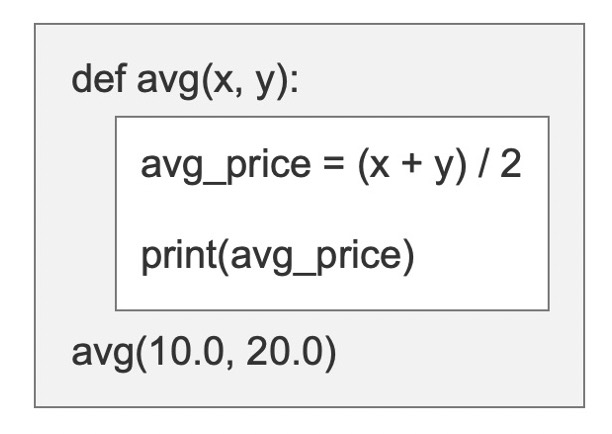

### 4.2　全局变量
相对于局部变量，在所有函数之外创建的变量，在整个文件范围内都是可见的。也就是说，在所有 def 外被首次赋值的变量，对于整个文件来说是全局的。

对于交互式命令行下输入的代码，可以看成是在一个临时文件中。因此， 在交互式命令行下， 在所有函数体之外定义的变量， 在整个交互过程中都是可见的， 直到被删除或者交互窗口关闭。

In [16]:
rate = 0.03
def taxCalculator(tax_income):
    return tax_income * rate
tax = taxCalculator(20000)
print('利用税率 {:.2%} 计算的应纳税额为 :{:.2f} 元'.format(rate, tax))

利用税率 3.00% 计算的应纳税额为 :600.00 元


### 4.3　同名的局部变量和全局变量
在变量使用过程中，有时不可避免地存在局部变量和全局变量同名的情况。在这种情况下，在局部作用域内，可见的是局部变量，全局变量被暂时隐藏起来。

In [17]:
rate = 0.03
def taxCalculator2(tax_income):
    if tax_income < 3000:
        rate = 0.03
    else:
        rate = 0.1
    print('利用税率 {:.2%} 计算的应纳税额为 :{:.2f} 元'.format(rate, tax_income * rate))

taxCalculator2(20000)

利用税率 10.00% 计算的应纳税额为 :2000.00 元


In [ ]:
print('调用函数后的税率是：{:.2%}'.format(rate))

### 4.4　global 语句
关键字 ``global`` 语句通常放在函数体的开始部分，用于申明变量为全局变量。其语法如下：
```python
global variable_names
```

In [18]:
rate = 0.03
def taxCalculator2(tax_income):
    global rate
    if tax_income < 3000:        
        rate = 0.03
    else:
        rate = 0.1
    print('利用税率 {:.2%} 计算的应纳税额为 :{:.2f} 元'.format(rate, tax_income * rate))

taxCalculator2(20000)

利用税率 10.00% 计算的应纳税额为 :2000.00 元


In [ ]:
print('调用函数后的税率是：{:.2%}'.format(rate))

## 5　匿名函数 lambda
### 5.1　lambda 函数定义
Python 中提供了一项非常有用的功能：利用 ``lambda`` 函数来替代 ``def``， 创建一个临时简单函数。 请注意， 与 ``def`` 语句不同，``lambda`` 是一个表达式。 这就使得 ``lambda`` 能够出现在函数调用的参数中。而 ``def`` 语句则不能作为参数传递给函数。
```python
lambda <args>: <expression>
```

lambda 表达式创建一个函数，它会返回函数本身。 这也是 lambda 被称为匿名函数的原因，它本身是没有名称的。如果需要在后面代码中使用该匿名函数，也可以将它赋值给一个变量。这个变量的类型就是一个函数。

In [19]:
getSecondItem = lambda x: x[1]
type(getSecondItem)

function

In [20]:
getSecondItem(['600000','浦发银行'])

'浦发银行'

下面列举一些 Python 中经常用到匿名函数的场景。

### 5.2　应用一：列表排序
对于列表的``sort()``方法，可以通过 key 来传入一个函数，``sort()`` 方法将利用这个函数对列表每个元素的返回结果来排序。

<font color=#A93226><b>【例 3】</b></font> <font size=3 face="楷体-简">有二维列表存储了股票的名称和涨跌幅。 编写程序， 将列表按照涨跌幅的升序排列。</font>

程序代码如下所示：

In [21]:
stock_list = [['招商银行', 0.0124], ['兴业银行', 0.0111],['中国银行', -0.0078],
              ['宁波银行', 0.0036],['浦发银行', 0.0000], ['工商银行', -0.0071]]
stock_list.sort(key=lambda x: x[1])
for name, pct in stock_list:
    print(name, pct)

中国银行 -0.0078
工商银行 -0.0071
浦发银行 0.0
宁波银行 0.0036
兴业银行 0.0111
招商银行 0.0124


``sort()`` 方法将列表中的每个元素分别传入匿名函数中， 得到 6 个涨跌幅，然后依据这 6 个涨跌幅对元素进行排序。具体排序过程如图所示：
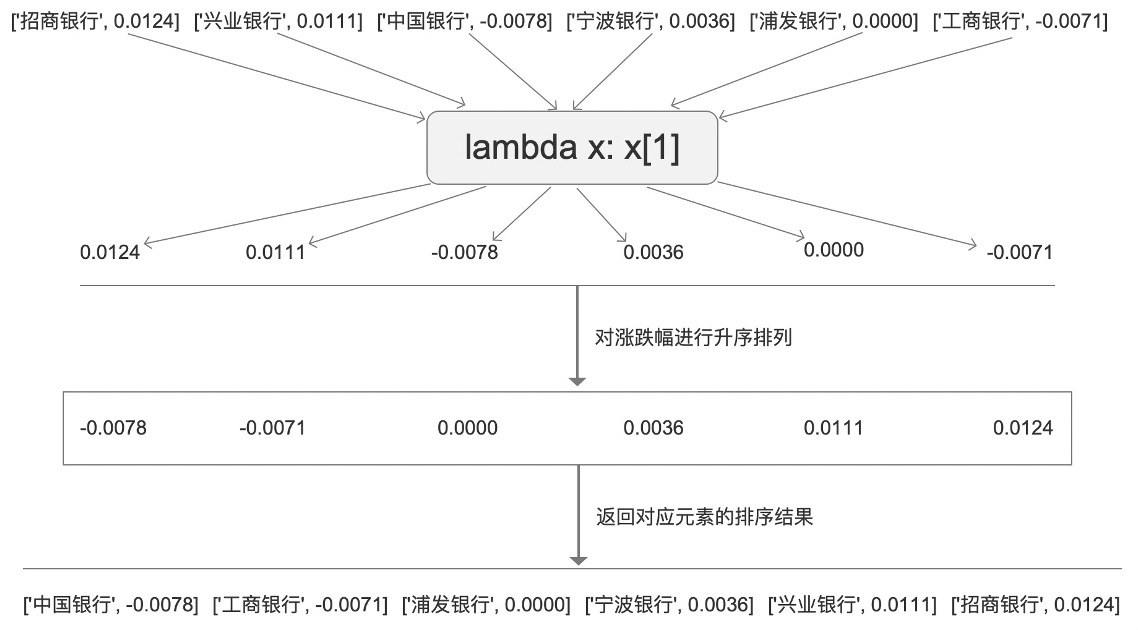

### 5.3　应用二：映射函数 map
在 4.7.4 节中提到的 ``map()`` 函数， 可以对序列中的每个元素应用某个内置函数， 并把函数结果收集起来，构成一个可迭代的 map 对象。 除了内置函数，常常会使用一些自定义的匿名函数来对序列元素进行映射。

<font color=#A93226><b>【例 4】</b></font> <font size=3 face="楷体-简">当收集股票信息时，无论是从文件读取，还是从网络获取，元素通常来说都是字符串类型。但是对于涨跌幅来说，应该是浮点型数据。因此，常常需要对每个涨跌幅进行数据转换。</font>

程序代码如下所示：

In [22]:
stock_list = [['招商银行', '0.0124'], ['兴业银行', '0.0111'],['中国银行', '-0.0078'],
              ['宁波银行', '0.0036'],['浦发银行', '0.0000'], ['工商银行', '-0.0071']]
stock_map = map(lambda x: [x[0], float(x[1])], stock_list)
type(stock_map)

map

In [23]:
stock_list = list(stock_map)
stock_list

[['招商银行', 0.0124],
 ['兴业银行', 0.0111],
 ['中国银行', -0.0078],
 ['宁波银行', 0.0036],
 ['浦发银行', 0.0],
 ['工商银行', -0.0071]]

### 5.4　应用三：选择函数 filter
与 map 函数类似，filter 函数也可以接受一个返回结果为布尔值的函数和可迭代对象作为实参。其作用是将可迭代对象中每一个元素都应用到传入的函数中，并将函数返回为 True 的元素添加到结果中，即对可迭代对象中的元素进行过滤。

<font color=#A93226><b>【例 5】</b></font> <font size=3 face="楷体-简">利用 filter 函数筛选出列表中上涨的股票信息。</font>

程序代码如下所示：

In [24]:
stock_list = [['招商银行', 0.0124], ['兴业银行', 0.0111],['中国银行', -0.0078],
              ['上海银行', 0.0033],['农业银行', -0.0080],['建设银行', -0.0086],
              ['宁波银行', 0.0036],['浦发银行', 0.0000], ['工商银行', -0.0071]]
stock_filter = filter(lambda x: x[1]>0, stock_list)
type(stock_filter)

filter

In [25]:
stock_list = list(stock_filter)
stock_list

[['招商银行', 0.0124], ['兴业银行', 0.0111], ['上海银行', 0.0033], ['宁波银行', 0.0036]]

## 6　递归函数
<font color="red">递归</font>是一种广泛应用算法。它能够把一个大型复杂的问题转化为一个与原问题相似的较小规模的问题来求解，用非常简洁的方法来解决重要问题。就像一个人站在装满镜子的房间中，看到的影像就是递归的结果。递归在数学和计算机应用上非常强大，能够非常简洁的解决重要问题。程序设计中，通过函数定义中调用函数自身的方式来实现<font color="red">递归</font>。

数学上有个经典的递归例子叫阶乘，阶乘通常定义为：<br>
$n! = n * (n-1) * (n-2)... * 2 * 1$

这个关系给出了另一种方式表达阶乘的方式：<br>
$n! = 
\begin{cases}
1 & \text{n=0} \\
n*(n-1)! & \text{n>0} 
\end{cases}$

阶乘的例子揭示了递归的2个关键特征：<br>
（1）存在一个或多个<font color=red>基例</font>，基例不需要再次递归，它是确定的表达式；<br>
（2）所有递归链要以一个或多个基例结尾。

<font color=#A93226><b>【例 6】</b></font> <font size=3 face="楷体-简">根据用户输入的整数 n， 计算并输出 n 的阶乘值。</font>

程序代码如下所示：

In [26]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)
num = int(input("请输入一个整数: "))
print('{}的阶乘为:{}'.format(num, factorial(num)))

请输入一个整数: 9
9的阶乘为:362880


基例有时不止一个，可能有多个。

<font color=#A93226><b>【例 7】</b></font> <font size=3 face="楷体-简">斐波那契数列（Fibonacci sequence），又称黄金分割数列、因数学家列昂纳多·斐波那契（Leonardoda Fibonacci）。以兔子繁殖为例子而引入，故又称为“兔子数列”，指的是这样一个数列：1、1、2、3、5、8、13、21、34、……

在数学上，斐波纳契数列以如下被以递推的方法定义：$F(1)=1, F(2)=1, F(n)=F(n-1)+F(n-2)（n>=3, n∈N）$

这个数列从第3项开始，每一项都等于前两项之和。

编写程序，用户输入正整数 n，输出斐波那契数列的前 n 项。

</font>

程序代码如下所示：

In [27]:
def fibo(i):
    if i in (0,1):
        return 1
    else:
        return fibo(i-1) + fibo(i-2)
    
num = int(input('请输入一个大于 3 的正整数 :'))
print('\n斐波那契数列的前 {} 项为：'.format(num))
for i in range(1, num+1):
    print(fibo(i), end=' ')

请输入一个大于 3 的正整数 :9

斐波那契数列的前 9 项为：
1 2 3 5 8 13 21 34 55 

试试打印出前50项：

In [ ]:
for i in range(50):
    print(fibo(i), end=' ')

1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 832040 1346269 2178309 3524578 5702887 9227465 14930352 24157817 39088169 63245986 102334155 165580141 

<u>如此之慢的原因是什么？</u>
<font color='white'>每次在计算第i项值时，都需要递归调用直到fibo(0)，也就是说像fibo(0),fibo(1),fibo(2),fibo(3)被计算了无数次，如果我们能在第一次计算出来后就存储下来，以供后面使用，会不会快些？<font>

让我们使用字典改进一下：

In [1]:
calculate_dic = {1: 1, 2: 1}

def fibByDic(n):
    if n not in calculate_dic:
        new_value = fibByDic(n-1) + fibByDic(n-2)
        calculate_dic[n] = new_value
    return calculate_dic[n]
num = int(input('请输入一个大于3的正整数:'))
print('\n斐波那契数列的前{}项为：'.format(num))
for i in range(1, num + 1):
    print(fibByDic(i), end=' ')

请输入一个大于3的正整数:9

斐波那契数列的前9项为：
1 1 2 3 5 8 13 21 34 

和简单的递归相比较，速度是否快到让你怀疑人生？所以，有的时候<b><font size=5 color=red>算法很重要</font></b>。程序设计可以让你的工作由几天节约至几个小时，好的算法可能可以让你的程序运行时间从几个小时节约至几秒钟。


<font color=#A93226><b>【课堂案例】</b></font> <font size=3 face="楷体-简">字符串反转: 对于用户输入的字符串s，利用递归的方式，输出反转后的字符串。</font>

In [ ]:
def reverse(s):
    return reverse(s[1:]) + s[0]
reverse("ABC")

观察这个函数的工作过程。s[0]是首字符，s[1:]是剩余字符串，将它们反向连接，可以得到反转字符串。执行这个程序，出错了，为什么？？？

## 7 <font color=#A93226>案例：</font>个人贷款计算器

<font size=3 face="楷体-简">个人贷款的还款方式分为等额本息还款和等额本金还款两种方式。 在第 4.8 节的案例 中，实现了等额本金还款方式。利用函数，可以实现更加复杂的系统。现要求编写个人贷款计算器，根据用户输入的贷款金额、贷款期限、还款方式和贷款年利率，打印出支付总利息 和每个月的详细信息（包含还款本金、利息和剩余金额），其中贷款年利率默认为 4.9%。
</font>

程序代码如下所示：

In [ ]:
def loanByAvgAmt(loan_amt, loan_month, month_rate):
    repaid_amt = 0
    #每月还款的等额本金
    loan_amt_per_month = loan_amt / loan_month  
    need_paid_interest = 0
    for i in range(1, loan_month + 1):
        #每月还款的利息
        interest_amt = (loan_amt - repaid_amt) * month_rate
        #所有利息的和
        need_paid_interest = need_paid_interest + interest_amt
        #每月还款的总额：还款本金 + 当月利息
        amt_for_month = loan_amt_per_month + interest_amt
        #已还款的本金金额
        repaid_amt = repaid_amt + loan_amt_per_month
        print('第{}个月需还:{:.2f},其中本金{:.2f},利息{:.2f}。本金余额:{:.2f}'.format(
        i,amt_for_month,loan_amt_per_month,interest_amt,loan_amt - repaid_amt))
    print('等额本金贷款支付的利息总额为：{:.2f}元'.format(need_paid_interest))

# 等额本息贷款
def loanByAvgAmtAndInterest(loan_amt, loan_month, month_rate):
    repaid_amt = 0
    #每月还款的等额本息计算公式
    need_paid_per_month = loan_amt * ((month_rate * (1 + month_rate) ** loan_month)/((1 + month_rate) ** loan_month - 1))
    need_paid_interest = 0
    for i in range(1, loan_month + 1):
        #每月还款的利息
        interest_amt = (loan_amt - repaid_amt) * month_rate
        #所有利息的和
        need_paid_interest = need_paid_interest + interest_amt
        #每月还款的等额本息中的本金
        repaid_amt_for_month = need_paid_per_month - interest_amt
        #已还款的本金金额
        repaid_amt = repaid_amt + repaid_amt_for_month
        print('第{}个月需还:{:.2f},其中本金:{:.2f},利息:{:.2f}。本金余额:{:.2f}'.format(
            i,need_paid_per_month,repaid_amt_for_month,interest_amt,loan_amt - repaid_amt))
    print('等额本息贷款支付的利息总额为:{:.2f}元。'.format(need_paid_interest))

def loanCaculator(loan_amt, loan_month, loan_type , year_rate = 0.049):
    month_rate = year_rate / 12
    if loan_type == 1:
        loanByAvgAmt(loan_amt, loan_month, month_rate)
    elif loan_type == 2:
        loanByAvgAmtAndInterest(loan_amt, loan_month, month_rate)
    else:
        print('贷款方式输入错误。')


amount = float(input('请输入贷款金额:'))
month = int(input('请输入贷款期限（月）:'))              
type_selector = int(input('请输入还款方式（1为等额本金，2为等额本息）:'))
rate_str = input('请输入贷款年利率（直接回车为默认利率4.9%）:')
if rate_str and len(rate_str) > 0:
    loanCaculator(amount, month, type_selector, float(rate_str))
else:
    loanCaculator(amount, month, type_selector)

实现生活费管理程序中打印支出类别的小功能。由于该功能在程序多处需要使用，因此将其定义成函数，在需要输出支出类别的位置调用该函数即可。

程序代码如下：

In [ ]:
def print_cat(in_dic):
    cat_list = list(in_dic.items())
    cat_list.sort(key=lambda x: x[0])
    print('支出类别：')
    print('-' * 10)
    for item in cat_list:
        print('{}. {}'.format(*item))
    print('-' * 10)
        
cat_dic = {1:'日常支出', 2:'学习用品', 3:'其他支出'}
print_cat(cat_dic)

## 【小结】
本章介绍了在利用程序解决问题时非常重要的函数概念。 函数能把代码块进行打包，对复杂任务进行分解，最大程度地实现代码重用，减少了代码冗余。

通过 ``def`` 语句会创建一个与函数名对应的函数类型变量。 函数体中可以包含 0 个 或多个 ``return`` 语句。 执行 ``return`` 语句会将值返回到调用函数时的暂停处。 通常情况下，函数需要的数据通过参数传递。调用函数时可以通过位置参数和关键字参数两种形式将实参赋值给形参。 定义函数时可以指定形参的默认值， 通过``*``收集位置参数，通过``**``收集关键字参数。在调用函数时，实参可以使用``*``将列表、元组等值解包成位置参数形式， 也可以使用``**``将字典类型的实参值解包成关键字参数形式。

根据作用域的不同，变量有局部变量和全局变量之分。 在局部作用域中，同名的局部变量会使得全局变量隐藏起来。``global`` 语句可以避免在局部作用域创建同名的局部变量， 保证使用的是全局变量。``lambda`` 表达式创建匿名函数， 用于实现简单功能的函数， 通常作为实参赋值给函数的形参。 递归函数是在函数定义中调用自身的函数，能够把一个大型复杂的问题转化为一个与原问题相似的较小规模的问题来解决。

## 8 <font color=#A93226>获取图片的小例子： 知识点有xpath、函数调用</font>

In [ ]:
import requests
import os
from lxml import etree

if __name__ == '__main__':
    url = 'https://www.vcg.com/creative-image/xigua/'
    header = {
            'User_Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.63 Safari/537.36 Edg/102.0.1245.39'
    }

    response = requests.get(url=url, headers=header)
    response.encoding = 'utf-8'
    page_text = response.text
    tree = etree.HTML(page_text)
    figure_list = tree.xpath('//div[@class="gallery_inner"]/figure')
    if not os.path.exists('./piclitl'):
        os.makedirs('./piclitl')
    for figure in figure_list:
        try:
            img_src = figure.xpath('./a/img/@data-src')[0]
        except(IndexError):
            print('未成功匹配到字段')
        img_src = 'https:' + img_src
        img_name = img_src.split('/')[-1]
        try:
            img_data = requests.get(url=img_src, headers=header).content
        except(requests.exceptions.InvalidURL):
            print('没有访问地址')
        img_path = 'piclitl/' + img_name
        with open(img_path, 'wb') as fp:
            fp.write(img_data)
            print(img_name, '下载成功')

不用函数调用的方式：

In [ ]:
import requests
import os
import time
from lxml import etree


url = 'https://www.vcg.com/creative-image/xigua/'
header = {
            'User_Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.63 Safari/537.36 Edg/102.0.1245.39'
    }

response = requests.get(url=url, headers=header)
response.encoding = 'utf-8'
page_text = response.text
tree = etree.HTML(page_text)
figure_list = tree.xpath('//div[@class="gallery_inner"]/figure')
if not os.path.exists('./piclitl'):
   os.makedirs('./piclitl')
for figure in figure_list:
    try:
       img_src = figure.xpath('./a/img/@data-src')[0]
    except(IndexError):
            print('未成功匹配到字段')
    img_src = 'https:' + img_src
    img_name = img_src.split('/')[-1]
    try:
        img_data = requests.get(url=img_src, headers=header).content
    except(requests.exceptions.InvalidURL):
        print('没有访问地址')
    time.sleep(2)
    
img_path = 'piclitl/' + img_name
with open(img_path, 'wb') as fp:
            fp.write(img_data)
            print(img_name, '下载成功')